In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Mall_Customers (3).csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.drop(columns=["CustomerID", "Gender"],inplace=True)


In [9]:
df.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


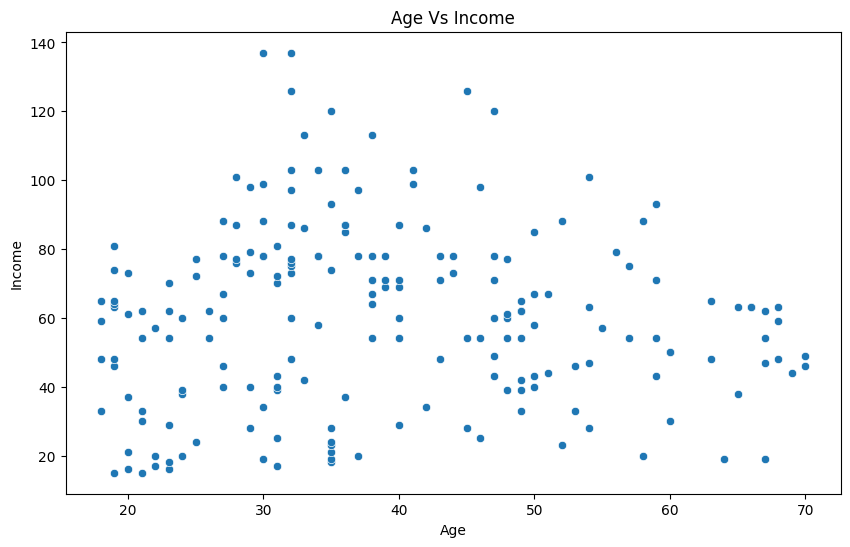

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age" , y="Annual Income (k$)" , data=df)
plt.title("Age Vs Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

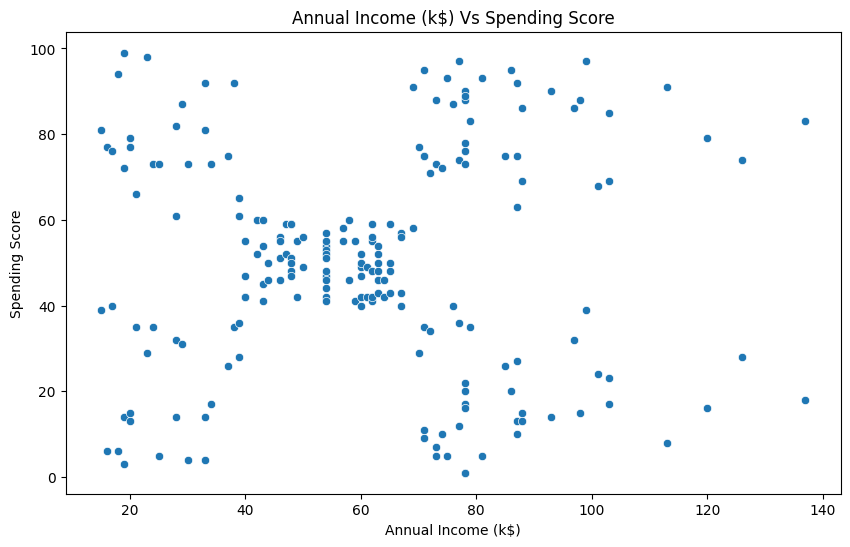

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income (k$)" , y="Spending Score (1-100)" , data=df)
plt.title("Annual Income (k$) Vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

In [14]:
def skewness_name(skewness):
    if skewness>0:
        return "Right Skewness"
    elif skewness<0:
        return "Left Skewness"
    else:
        return "Normal"
    
print("Skewness of Age : ",skewness_name(df["Age"].skew()))
print("Skewness of Annual Income : ",skewness_name(df["Annual Income (k$)"].skew()))
print("Skewness of Spending Score (1-100) : ",skewness_name(df["Spending Score (1-100)"].skew()))



Skewness of Age :  Right Skewness
Skewness of Annual Income :  Right Skewness
Skewness of Spending Score (1-100) :  Left Skewness


In [15]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data,columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df.select_dtypes(include=[np.number]))
df['Cluster'] = kmeans.labels_
df.head()


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [17]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Cluster')
scaled_df = scaler.fit_transform(df[numeric_cols])

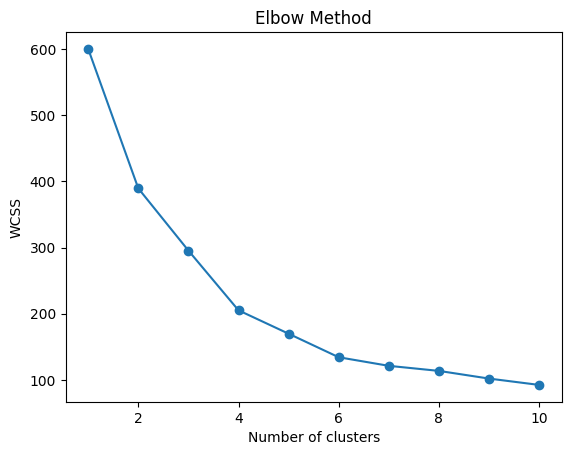

In [18]:
#check with ELBow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')     
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

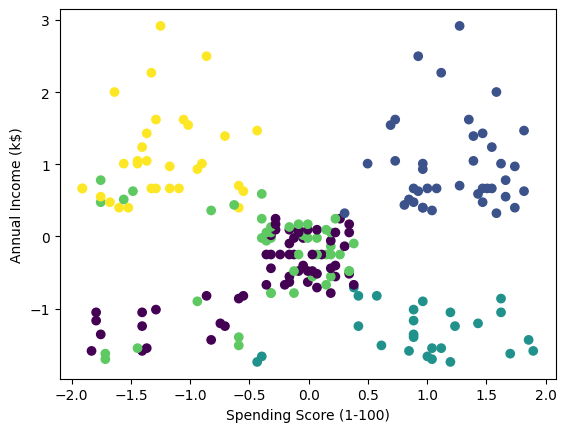

In [19]:
plt.scatter(df["Spending Score (1-100)"],
            df["Annual Income (k$)"],
            c=df["Cluster"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")


In [20]:
df.to_csv("Clustered_mall_customers.csv" , index=False)

In [21]:
from sklearn.model_selection import train_test_split
import pandas as pd
df=pd.read_csv("clustered_mall_customers.csv")
X=df.drop("Cluster",axis=1)
y=df["Cluster"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy score",accuracy_score(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))

accuracy score 0.95
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       0.60      1.00      0.75         3
           3       1.00      0.83      0.91        12
           4       1.00      1.00      1.00        10

    accuracy                           0.95        40
   macro avg       0.92      0.97      0.93        40
weighted avg       0.97      0.95      0.95        40

Confusion matrix
 [[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  2 10  0]
 [ 0  0  0  0 10]]


In [22]:
import joblib
joblib.dump(model,"kmeans_model.pkl")

['kmeans_model.pkl']